
*   hypothèse : le cours n'a pas vraiment d'histoire à raconter, vos modèles/algo ne vous renvoient rien de significatif
*   et si on fesait une simulation de montecarlo ?

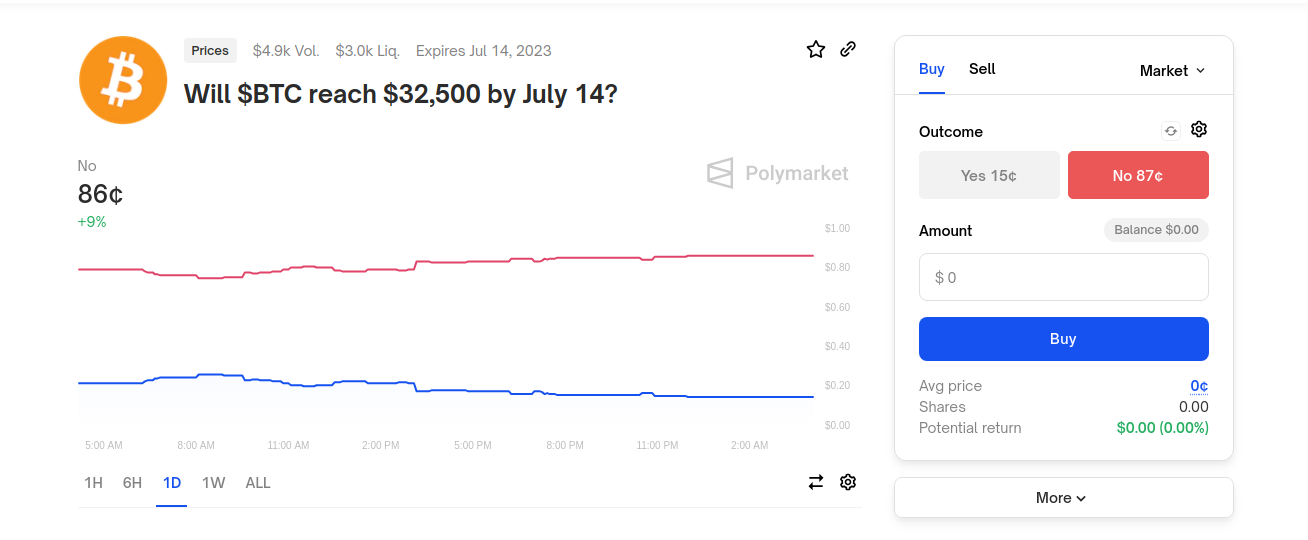

Challenge : Comment puis-je prédire la probabilité que le BTC soit > 32500 dans 6 jours sachant son cours actuel à 30304 ?

Réflexion :
   - je connais les variations du passé
   - Prédire le cours est surement complexe ?
   - Mais si je rejouais un cours théorique sur 6 jours des milliers de fois.
   - Je n'aurais plus qu'à compter les résultats au jour 6 > 32500 ?

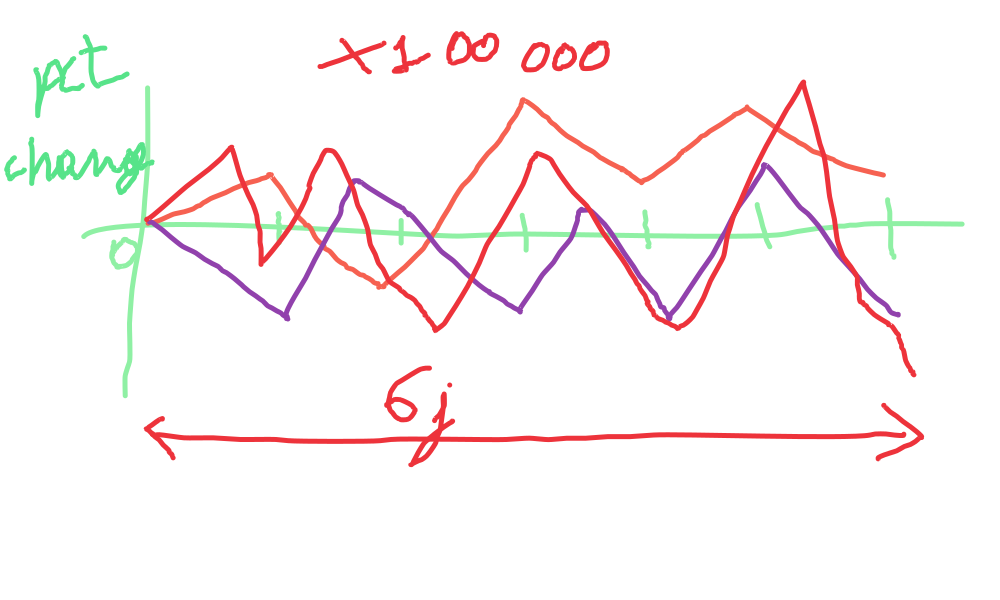

In [ ]:
%pip install pandas numpy yfinance matplotlib

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [ ]:
# Fetch BTC data
btc = yf.Ticker("BTC-USD")
data = btc.history(period='1000d')  # Use 1000 days of data

data.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-08 00:00:00+00:00,30346.921875,30374.437500,30080.160156,30292.541016,7509378699,0.0,0.0
2023-07-09 00:00:00+00:00,30304.685547,30398.357422,30271.306641,30296.330078,7693772800,0.0,0.0


In [ ]:
# Exclude the last (possibly incomplete) row


# Calculate daily percent change and remove mean bias
data['returns'] = data['Close'].pct_change()
data['returns'] = data['returns'] - data['returns'].mean()  # Remove mean bias
data = data.dropna()

data.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns
Date,,,,,,,,
2023-07-08 00:00:00+00:00,30346.921875,30374.437500,30080.160156,30292.541016,7509378699,0.0,0.0,-0.003249
2023-07-09 00:00:00+00:00,30304.685547,30398.357422,30271.306641,30296.330078,7693772800,0.0,0.0,-0.001485


In [ ]:
# Apply exponential weighting
weights = [(0.5**(1/100))**i for i in range(len(data))][::-1]
weights /= np.sum(weights)  # Normalize weights

In [ ]:
def monte_carlo_simulation(returns, weights, num_iterations, num_days):
    prices = []
    last_price = data['Close'].iloc[-1]
    for _ in range(num_iterations):
        daily_returns = np.random.choice(returns, size=num_days, p=weights)
        price_path = [last_price]
        for ret in daily_returns:
            price_path.append(price_path[-1] * (1 + ret))
        prices.append(price_path)
    return prices

In [ ]:
# Run Monte Carlo simulation with 100,000 iterations for 6 days
prices = monte_carlo_simulation(data['returns'], weights, 100000, 6)

In [ ]:
len(prices)

100000

In [ ]:
prices[0]

[30348.4453125,
 30498.99893093267,
 31220.20565907594,
 31021.566318624107,
 30767.393017752296,
 31141.64800355048,
 30994.021468453873]

In [ ]:
# Calculate probability of ending above $32,500 after 6 days
prob_above_32500 = sum(p[-1] > 32500 for p in prices) / len(prices)

print(f"The probability that the price will be above $32,500 after 6 days is {prob_above_32500 * 100}%. with last 1000 day btc sample and exp weight on draw")

The probability that the price will be above $32,500 after 6 days is 12.675%. with last 1000 day btc sample and exp weight on draw


In [ ]:
# Run Monte Carlo simulation with 100,000 iterations for 6 days
# Apply exponential weighting


prices = monte_carlo_simulation(data['returns'], np.ones(len(data)) / len(data), 100000, 6)

# Calculate probability of ending above $32,500 after 6 days
prob_above_32500 = sum(p[-1] > 32500 for p in prices) / len(prices)

print(f"The probability that the price will be above $32,500 after 6 days is {prob_above_32500 * 100}%. with last 1000 day btc sample")

The probability that the price will be above $32,500 after 6 days is 19.377%. with last 1000 day btc sample
